# Task #1 Prediction using Supervised ML

### Author : Yash Kumar Sharma

### Problem Statement: 
#### * Predict the percentage of a student based on the no. of study hours
#### * What will be the predicted score if a student studies for 9.25 hrs/day?

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [7]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
data.sample(10)

,Hours,Scores
2,3.2,27
6,9.2,88
15,8.9,95
17,1.9,24
1,5.1,47
21,4.8,54
16,2.5,30
22,3.8,35
14,1.1,17
10,7.7,85


## Data Exploration

In [10]:
# Structure of Data
data.shape

(25, 2)

In [15]:
# Detailed View of Data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
# Correlation between Variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Checking the Null values.

In [17]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# There is not Null valus.

## Plotting Distribution of Data

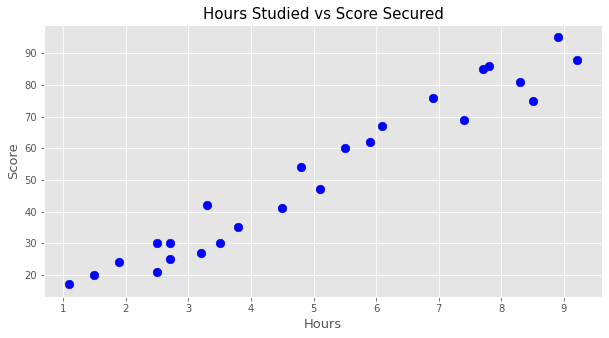

In [40]:
plt.figure(figsize=(10,5))
plt.title('Hours Studied vs Score Secured', fontsize=15)
plt.xlabel('Hours', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.scatter(data.Hours, data.Scores, s=75, color='blue')
plt.show()

# SIMPLE LINEAR REGRESSION 

In [19]:
# Importing Libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Creating Training & Testing Set

In [20]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (25, 1)
y: (25,)


In [21]:
# Spliting dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Structure of each set in Train & Test data
col = ['X_train', 'X_test', 'y_train', 'y_test']
tset = [X_train, X_test, y_train, y_test]
for i in range(len(col)):
    print(f'{col[i]}: {tset[i].shape}')

X_train: (20, 1)
X_test: (5, 1)
y_train: (20,)
y_test: (5,)


### Plotting Distribution of Training & Testing Dataset

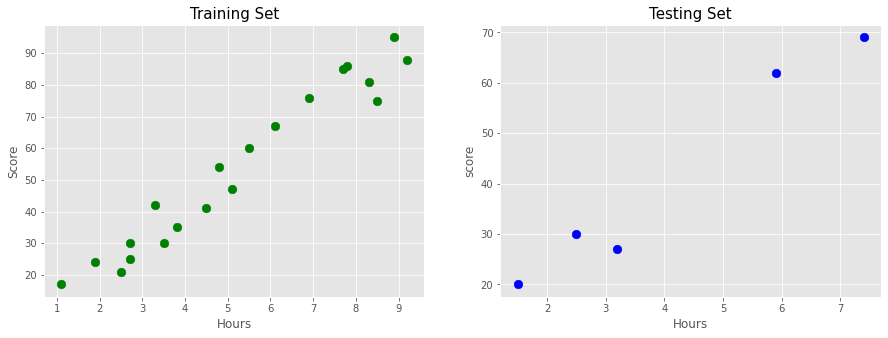

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(X_train, y_train, s=75, color='green')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Score')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(X_test, y_test, s=75, color='blue')
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('score')
plt.show()

## Modeling & Fitting

In [31]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficient: [9.91065648]
Intercept: 2.018160041434683


### Plotting Regression Line

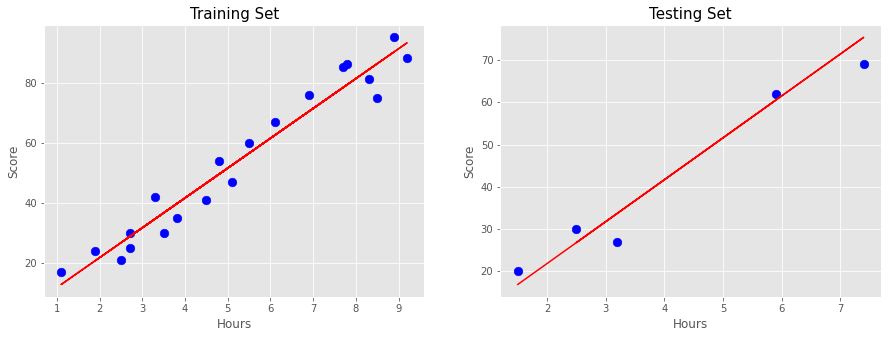

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=15)
ax[0].scatter(X_train, y_train, s=75, color='blue')
ax[0].plot(X_train, regr.coef_*X_train + regr.intercept_, '-r')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Score')
ax[1].set_title('Testing Set', fontsize=15)
ax[1].scatter(X_test, y_test, s=75, color='blue')
ax[1].plot(X_test, regr.coef_*X_test + regr.intercept_, '-r')
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('Score')
plt.show()

## Making Predictions

In [35]:
y_pred = regr.predict(X_test).astype(int)
pd.DataFrame({'Hours': X_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})

,Hours,Actual Score,Predicted Score
0,1.5,20,16
1,3.2,27,33
2,7.4,69,75
3,2.5,30,26
4,5.9,62,60


## Evaluation

In [36]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 4.4
Residual Sum of Squares(MSE): 21.6
R2-Score: 0.9454875832828589


### * What will be predicted score if a student studies for 9.25 hrs/ day? 

In [37]:
hours = 9.25
score = regr.predict([[hours]]).astype(int)
pd.DataFrame({'Hours': hours, 'Predicted Score': score})

,Hours,Predicted Score
0,9.25,93


#### If a student studies for 9.25 hrs/day, the Score will be *93*  as per this model.

In [53]:
accuracy = metrics.r2_score(y_test, y_pred)
print(f'Accuracy of the Model is: {round(accuracy*100)} %')

Accuracy of the Model is: 95.0 %


                                                     Thank You so much 